<h1><center>Charity</center></h1>

### In this Dataset, we will apply supervised learning techniques and an analytical mind on data collected for the U.S. census to help CharityML.

![chirty](https://blog.vancity.com/wp-content/uploads/2016/12/GiveHands-iStock-Blog-1280x620-1280x620.jpg)

[source](https://www.kaggle.com/c/udacity-mlcharity-competition/data)

In [123]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline

In [124]:
charity = pd.read_csv('census.csv')
charity.head()
clean_dataset = charity
clean_dataset

age          workclass education_level  education-num  \
0       39          State-gov       Bachelors           13.0   
1       50   Self-emp-not-inc       Bachelors           13.0   
2       38            Private         HS-grad            9.0   
3       53            Private            11th            7.0   
4       28            Private       Bachelors           13.0   
...    ...                ...             ...            ...   
45217   33            Private       Bachelors           13.0   
45218   39            Private       Bachelors           13.0   
45219   38            Private       Bachelors           13.0   
45220   44            Private       Bachelors           13.0   
45221   35       Self-emp-inc       Bachelors           13.0   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
...                    ...                 ...             ...   
45217        Never-married      Prof-specialty       Own-child   
45218             Divorced      Prof-specialty   Not-in-family   
45219   Married-civ-spouse      Prof-specialty         Husband   
45220             Divorced        Adm-clerical       Own-child   
45221   Married-civ-spouse     Exec-managerial         Husband   

                      race      sex  capital-gain  capital-loss  \
0                    White     Male        2174.0           0.0   
1                    White     Male           0.0           0.0   
2                    White     Male           0.0           0.0   
3                    Black     Male           0.0           0.0   
4                    Black   Female           0.0           0.0   
...                    ...      ...           ...           ...   
45217                White     Male           0.0           0.0   
45218                White   Female           0.0           0.0   
45219                White     Male           0.0           0.0   
45220   Asian-Pac-Islander     Male        5455.0           0.0   
45221                White     Male           0.0           0.0   

       hours-per-week  native-country income  
0                40.0   United-States  <=50K  
1                13.0   United-States  <=50K  
2                40.0   United-States  <=50K  
3                40.0   United-States  <=50K  
4                40.0            Cuba  <=50K  
...               ...             ...    ...  
45217            40.0   United-States  <=50K  
45218            36.0   United-States  <=50K  
45219            50.0   United-States  <=50K  
45220            40.0   United-States  <=50K  
45221            60.0   United-States   >50K  

[45222 rows x 14 columns]

### Check Nulls

In [125]:
charity.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Check Types

In [126]:
charity.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

### Check unique Values for catagorial features

In [127]:
clean_dataset.describe(include=['O'])

workclass education_level       marital-status     occupation  \
count      45222           45222                45222          45222   
unique         7              16                    7             14   
top      Private         HS-grad   Married-civ-spouse   Craft-repair   
freq       33307           14783                21055           6020   

       relationship    race    sex  native-country income  
count         45222   45222  45222           45222  45222  
unique            6       5      2              41      2  
top         Husband   White   Male   United-States  <=50K  
freq          18666   38903  30527           41292  34014

### Log-transform the skewed features Applying log transformation on capital-gain and capital-loss helped to reduce skew.

In [128]:
skewed = ['capital-gain', 'capital-loss']
# Log-transform the skewed features (create function to use later for test set)
def log_transform(data):
    return data[skewed].apply(lambda x: np.log(x + 1))
    
clean_dataset[skewed] = log_transform(clean_dataset)

### Normalize and scale numirical features

In [138]:
# # standrize the values
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features = scaler.fit_transform(features)

continues = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def normalizeMAXMIN(data):
    
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data[continues])
    return data

def normalizeSTN(data):
    
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data[continues])
    return data

clean_dataset[continues]= normalizeSTN(clean_dataset)

### Using the oneHotEncoder class for catagorial featurs 'using Dummy Encoding'

In [139]:
# One-hot encode thedata using pandas.get_dummies()
features = pd.get_dummies(clean_dataset.drop(['income'],1))

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [140]:
features

age  education-num  capital-gain  capital-loss  hours-per-week  \
0      0.301370       0.800000      0.667492           0.0        0.397959   
1      0.452055       0.800000      0.000000           0.0        0.122449   
2      0.287671       0.533333      0.000000           0.0        0.397959   
3      0.493151       0.400000      0.000000           0.0        0.397959   
4      0.150685       0.800000      0.000000           0.0        0.397959   
...         ...            ...           ...           ...             ...   
45217  0.219178       0.800000      0.000000           0.0        0.397959   
45218  0.301370       0.800000      0.000000           0.0        0.357143   
45219  0.287671       0.800000      0.000000           0.0        0.500000   
45220  0.369863       0.800000      0.747375           0.0        0.397959   
45221  0.246575       0.800000      0.000000           0.0        0.602041   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
45217                       0                     0                   1   
45218                       0                     0                   1   
45219                       0                     0                   1   
45220                       0                     0                   1   
45221                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
45217                        0                            0  ...   
45218                        0                            0  ...   
45219                        0                            0  ...   
45220                        0                            0  ...   
45221                        1                            0  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
45217                         0                            0   
45218                         0                            0   
45219                         0                            0   
45220                         0                            0   
45221                         0                            0   

       native-country_ Scotland  native-country_ South  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
45217                         0                      0   
45218                         0                      0   
45219                         0                      0   
45220   

In [131]:
goal = clean_dataset.income.map({'<=50K': 0, '>50K':1})
goal

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

## Let's see the correlation via a heat map !

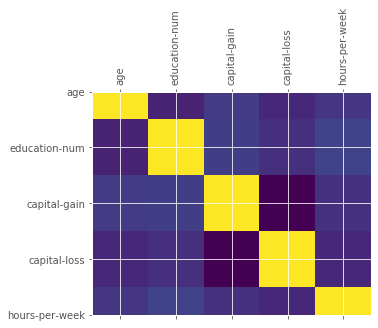

In [132]:
corr = clean_dataset.corr()
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.grid(True)
plt.show()

## Implementing Logistic Regression On Charity Data:

In [141]:
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.2,random_state=0)

## let's build our model

In [142]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Well,, we need to evaluate that model !
## Let's use the confusion Matrix

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

0     1
0  6301   539
1   891  1314

## let's get the accuracy

In [145]:
logistic.score(test_set, goal_test)

0.841901603095633

In [310]:
probs_train = logistic.predict_proba(train_set)[:, 1]

In [313]:
probs_train

array([0.38228788, 0.2941191 , 0.00270847, ..., 0.75627535, 0.49662292,
       0.20114068])

# --------------------------------------------------------------------------------------------------------------

## Apply the Same steps as Appove on Kaggel TEST Dataset For Competition

## Reading testing data

In [346]:
test = pd.read_csv("test_census.csv") 

## Any log feature that changed suddenly must be trasformed

In [334]:
skewed = ['capital-gain', 'capital-loss']
# Log-transform the skewed features (create function to use later for test set)
def log_transform(data):
    return data[skewed].apply(lambda x: np.log(x + 1))
    
test[skewed] = log_transform(test)

## save ids in new column

In [335]:
# rename the first column to id
test['id'] = test.iloc[:,0] 

In [336]:
idd = test['id']

## Droping two uneeded columns for the logistic moldel because the model requier 103 column

In [337]:
test = test.drop(['Unnamed: 0','id'] ,axis=1)       

In [338]:
test

age          workclass education_level  education-num  \
0      21.0            Private            10th            6.0   
1      49.0            Private       Bachelors           13.0   
2      44.0   Self-emp-not-inc      Assoc-acdm           12.0   
3      34.0            Private       Bachelors           13.0   
4      24.0            Private         HS-grad            9.0   
...     ...                ...             ...            ...   
45217  17.0            Private            11th            7.0   
45218  50.0        Federal-gov    Some-college           10.0   
45219  17.0       Self-emp-inc            12th            8.0   
45220  38.0            Private       Bachelors           13.0   
45221  22.0            Private    Some-college           10.0   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse        Craft-repair         Husband   White   
1       Married-civ-spouse        Adm-clerical            Wife   White   
2       Married-civ-spouse       Other-service            Wife   White   
3       Married-civ-spouse               Sales         Husband   White   
4       Married-civ-spouse   Machine-op-inspct         Husband   White   
...                    ...                 ...             ...     ...   
45217        Never-married       Other-service       Own-child   White   
45218        Never-married        Adm-clerical   Not-in-family   White   
45219        Never-married        Adm-clerical       Own-child   White   
45220   Married-civ-spouse      Prof-specialty         Husband   White   
45221        Never-married     Farming-fishing       Own-child   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  
0         Male      0.000000           0.0            40.0   United-States  
1       Female      0.000000           0.0            40.0   United-States  
2       Female      0.000000           0.0            99.0   United-States  
3         Male      8.895493           0.0            46.0   United-States  
4         Male      0.000000           0.0            40.0   United-States  
...        ...           ...           ...             ...             ...  
45217     Male      0.000000           0.0            15.0   United-States  
45218     Male      0.000000           0.0            40.0   United-States  
45219   Female      0.000000           0.0            16.0   United-States  
45220     Male      8.947546           0.0            40.0   United-States  
45221     Male      0.000000           0.0            10.0   United-States  

[45222 rows x 13 columns]

## Scalling and Normalize Numeric Test Data

In [339]:
# # standrize the values
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features = scaler.fit_transform(features)

continues = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def normalizeMAXMIN(data):
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data[continues])
    return data

def normalizeSTN(data):
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data[continues])
    return data

test[continues]= normalizeMAXMIN(test)

## Encoding all Catagorial features

In [320]:
# One-hot encode thedata using pandas.get_dummies()
test = pd.get_dummies(test)

# Print the number of features after one-hot encoding
encoded = list(test.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


## Filling NAN Values With mean For Numeric Data

In [345]:
test = test.fillna(test.mean())
test

age          workclass education_level  education-num  \
0      0.054795            Private            10th       0.333333   
1      0.438356            Private       Bachelors       0.800000   
2      0.369863   Self-emp-not-inc      Assoc-acdm       0.733333   
3      0.232877            Private       Bachelors       0.800000   
4      0.095890            Private         HS-grad       0.533333   
...         ...                ...             ...            ...   
45217  0.000000            Private            11th       0.400000   
45218  0.452055        Federal-gov    Some-college       0.600000   
45219  0.000000       Self-emp-inc            12th       0.466667   
45220  0.287671            Private       Bachelors       0.800000   
45221  0.068493            Private    Some-college       0.600000   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse        Craft-repair         Husband   White   
1       Married-civ-spouse        Adm-clerical            Wife   White   
2       Married-civ-spouse       Other-service            Wife   White   
3       Married-civ-spouse               Sales         Husband   White   
4       Married-civ-spouse   Machine-op-inspct         Husband   White   
...                    ...                 ...             ...     ...   
45217        Never-married       Other-service       Own-child   White   
45218        Never-married        Adm-clerical   Not-in-family   White   
45219        Never-married        Adm-clerical       Own-child   White   
45220   Married-civ-spouse      Prof-specialty         Husband   White   
45221        Never-married     Farming-fishing       Own-child   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  
0         Male      0.000000           0.0        0.397959   United-States  
1       Female      0.000000           0.0        0.397959   United-States  
2       Female      0.000000           0.0        1.000000   United-States  
3         Male      0.772653           0.0        0.459184   United-States  
4         Male      0.000000           0.0        0.397959   United-States  
...        ...           ...           ...             ...             ...  
45217     Male      0.000000           0.0        0.142857   United-States  
45218     Male      0.000000           0.0        0.397959   United-States  
45219   Female      0.000000           0.0        0.153061   United-States  
45220     Male      0.777174           0.0        0.397959   United-States  
45221     Male      0.000000           0.0        0.091837   United-States  

[45222 rows x 13 columns]

## Ensuring that thre is no nulls

In [344]:
np.isnan(test)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [323]:
np.where(np.isnan(test))

(array([], dtype=int64), array([], dtype=int64))

In [324]:
test.isna().sum()

age                                0
education-num                      0
capital-gain                       0
capital-loss                       0
hours-per-week                     0
                                  ..
native-country_ Thailand           0
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
Length: 103, dtype: int64

In [325]:
test

age  education-num  capital-gain  capital-loss  hours-per-week  \
0      0.054795       0.333333      0.000000           0.0        0.397959   
1      0.438356       0.800000      0.000000           0.0        0.397959   
2      0.369863       0.733333      0.000000           0.0        1.000000   
3      0.232877       0.800000      0.772653           0.0        0.459184   
4      0.095890       0.533333      0.000000           0.0        0.397959   
...         ...            ...           ...           ...             ...   
45217  0.000000       0.400000      0.000000           0.0        0.142857   
45218  0.452055       0.600000      0.000000           0.0        0.397959   
45219  0.000000       0.466667      0.000000           0.0        0.153061   
45220  0.287671       0.800000      0.777174           0.0        0.397959   
45221  0.068493       0.600000      0.000000           0.0        0.091837   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   1   
1                           0                     0                   1   
2                           0                     0                   0   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
45217                       0                     0                   1   
45218                       1                     0                   0   
45219                       0                     0                   0   
45220                       0                     0                   1   
45221                       0                     0                   1   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            0  ...   
2                            0                            1  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
45217                        0                            0  ...   
45218                        0                            0  ...   
45219                        1                            0  ...   
45220                        0                            0  ...   
45221                        0                            0  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
45217                         0                            0   
45218                         0                            0   
45219                         0                            0   
45220                         0                            0   
45221                         0                            0   

       native-country_ Scotland  native-country_ South  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
45217                         0                      0   
45218                         0                      0   
45219                         0                      0   
45220   

In [326]:
len(logistic.predict(test))

45222

In [327]:
# make predictions
#test['income'] = logistic.predict_proba(test)[:, 1]
test['income'] = logistic.predict_proba(test)[:, 1]
test=test.join(idd)

In [280]:
test['income']

0        0.087925
1        0.644343
2        0.538259
3        0.895989
4        0.134664
           ...   
45217    0.000828
45218    0.091523
45219    0.001870
45220    0.909836
45221    0.002197
Name: income, Length: 45222, dtype: float64

In [328]:
# generate output file
test[['id', 'income']].to_csv("submission.csv", index=False)